# Using Make_blob generate data of 1000 data points with three cluster apply kmeans on it with k = 3 and use the metrics and get the accuracy (For Accuracy take reference of DBSCAN evaluation)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [3]:
clusters = [[-9,10],[-1,11],[-12,15]] # creating 3 clusters 
X,y = make_blobs(n_samples = 1000, centers = clusters)

In [4]:
X[:5]

array([[ -2.69872333,   8.61390016],
       [-11.23194226,   8.93709735],
       [ -9.68204762,   8.49449611],
       [-12.36582783,  15.14209745],
       [ -7.78831939,  10.61159358]])

In [5]:
y[:5]

array([1, 0, 0, 2, 0])

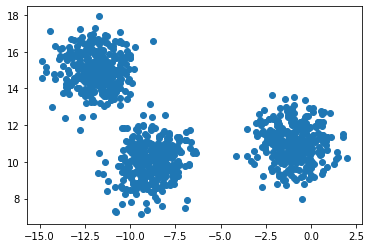

In [6]:
plt.scatter(X[:,0],X[:,1])

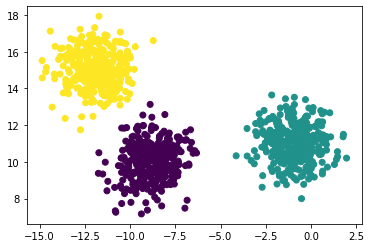

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
# Applying K means
from sklearn.cluster import KMeans
clusterKmeans = KMeans(n_clusters = 3)
clusterKmeans.fit(X)

KMeans(n_clusters=3)

In [9]:
clusterKmeans.labels_[:5]

array([1, 2, 2, 0, 2])

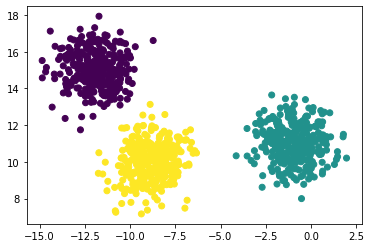

In [10]:
plt.scatter(X[:,0],X[:,1],c=clusterKmeans.labels_)

In [11]:
set(y) # to see the number of labels present in y col

{0, 1, 2}

In [12]:
set(clusterKmeans.labels_) # to see the number of labels present in clusterkmeans label col

{0, 1, 2}

In [14]:
# checking the accuracy score
from sklearn.metrics import f1_score
f1_score(y, clusterKmeans.labels_, average = 'weighted')

0.333

  # ● Apply DBscan on Cust Segmentation Data

In [17]:
data = pd.read_csv("Cust_Segmentation.csv")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [19]:
data.isnull().sum() 

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [20]:
df = data.dropna()

In [21]:
df.isnull().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64

In [22]:
df.shape

(700, 10)

In [23]:
X = df[['Age','Edu','Years Employed','Income','Card Debt','Other Debt','DebtIncomeRatio']]
X

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,6.3
1,47,1,26,100,4.582,8.218,12.8
2,33,2,10,57,6.111,5.802,20.9
3,29,2,4,19,0.681,0.516,6.3
4,47,1,31,253,9.308,8.908,7.2
...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,4.4
846,28,2,7,34,0.359,2.021,7.0
847,25,4,0,18,2.802,3.210,33.4
848,32,1,12,28,0.116,0.696,2.9


In [24]:
#to change the float value of independent variable to integer
X = X.astype('int') # independent variable
X[:5]

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,41,2,6,19,0,1,6
1,47,1,26,100,4,8,12
2,33,2,10,57,6,5,20
3,29,2,4,19,0,0,6
4,47,1,31,253,9,8,7


In [33]:
Y = data['Defaulted'].values # dependent variable # to change the float value of dependent varaiable to integer
Y[:5]

array([0., 0., 1., 0., 0.])

In [35]:
# standarizing the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit(X).transform(X)

In [36]:
x_sc[:5] # output after applying standard scaler.

array([[ 0.76830405,  0.29879269, -0.35900652, -0.72310225, -0.53023676,
        -0.47474247, -0.55853582],
       [ 1.51908977, -0.77932527,  2.64702891,  1.47870741,  1.38298866,
         1.64387147,  0.31874557],
       [-0.23274357,  0.29879269,  0.24220057,  0.30984549,  2.33960136,
         0.73589406,  1.48845408],
       [-0.73326739,  0.29879269, -0.65961006, -0.72310225, -0.53023676,
        -0.7774016 , -0.55853582],
       [ 1.51908977, -0.77932527,  3.39853777,  5.6376812 ,  3.77452042,
         1.64387147, -0.41232225]])

In [37]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
transformed_data = pca.fit_transform(x_sc)

In [38]:
transformed_data[:5]

array([[-0.78372621, -0.55000716],
       [ 3.71128459, -1.1548221 ],
       [ 1.93957324,  1.74546749],
       [-1.57896884,  0.05160925],
       [ 6.87781806, -2.40037195]])

In [39]:
# Applying DBScan Algorithm
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.9, min_samples = 80)
dbscan.fit(transformed_data)

DBSCAN(eps=0.9, min_samples=80)

In [40]:
dbscan.labels_[:5]

array([ 0, -1, -1,  0, -1], dtype=int64)

In [41]:
set(y)

{0, 1, 2}

In [42]:
set(dbscan.labels_)

{-1, 0}

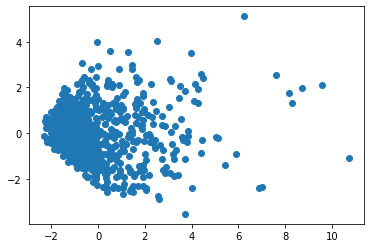

In [43]:
# plotting the graph
plt.scatter(transformed_data[:,0], transformed_data[:,1])

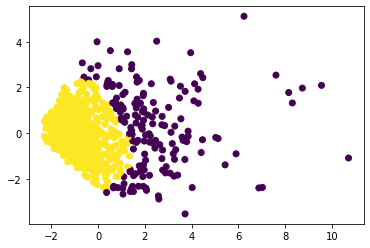

In [47]:
plt.scatter(transformed_data[:,0], transformed_data[:,1], c = dbscan.labels_)

##  Q. 2 Using dirtydata.csv Demonstrate all the techniques for removing the null values

● a. Replace by MEAN

In [48]:
import numpy as np 
import pandas as pd
df=pd.read_csv("dirtydata.csv")
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [49]:
df.shape

(32, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [52]:
mean = df.Calories.mean()#Treating Calories Column
mean

304.68

In [56]:
df['Calories'] = df.Calories.fillna(mean) 
df[:6]

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0


In [57]:
df.isnull().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [59]:
df1 = df.dropna() #dropna will remove all the rows containing null values 
df1

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.10
1,60,'2020/12/02',117,145,479.00
2,60,'2020/12/03',103,135,340.00
3,45,'2020/12/04',109,175,282.40
4,45,'2020/12/05',117,148,406.00
5,60,'2020/12/06',102,127,300.00
6,60,'2020/12/07',110,136,374.00
7,450,'2020/12/08',104,134,253.30
8,30,'2020/12/09',109,133,195.10
9,60,'2020/12/10',98,124,269.00


In [60]:
df1.isnull().sum() ## in df1 we traet data with mean of calories of 304.68

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

* b.Replace by MEDIAN

In [61]:
import numpy as np 
import pandas as pd
df2= pd.read_csv("dirtydata.csv")
df2.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


In [62]:
median = df2.Calories.median()#Treating Calories Column
median

291.2

In [64]:
mode = df2.Date.mode()#Treating Calories Column
mode

0    '2020/12/12'
Name: Date, dtype: object

In [67]:
df2['Calories'] = df2.Calories.fillna(median) 
# df2['Date'] = df2.Date.fillna(mode) 
df2

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [69]:
df2 = df2.dropna()
df2.isnull().sum() # in df2 we treat data with mean of calories of 291.20

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

* c.Replace by MODE

In [70]:
import numpy as np 
import pandas as pd
df3= pd.read_csv("dirtydata.csv")
df3.tail()

,Duration,Date,Pulse,Maxpulse,Calories
27,60,'2020/12/27',92,118,241.0
28,60,'2020/12/28',103,132,NaN
29,60,'2020/12/29',100,132,280.0
30,60,'2020/12/30',102,129,380.3
31,60,'2020/12/31',92,115,243.0


In [71]:
mode = df3.Calories.mode()#Treating Calories Column
mode

0    300.0
Name: Calories, dtype: float64

In [72]:
type(mode)

pandas.core.series.Series

In [73]:
mode = mode[0]
mode

300.0

In [74]:
df3['Calories'] = df3.Calories.fillna(mode) 
df3

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [75]:
# treating date column with mode
modedate = df3.Date.mode()
modedate 

0    '2020/12/12'
Name: Date, dtype: object

In [76]:
modedate = modedate[0]
modedate

"'2020/12/12'"

In [77]:
df3['Date'] = df3.Date.fillna(modedate)

In [78]:
df3

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0
5,60,'2020/12/06',102,127,300.0
6,60,'2020/12/07',110,136,374.0
7,450,'2020/12/08',104,134,253.3
8,30,'2020/12/09',109,133,195.1
9,60,'2020/12/10',98,124,269.0


In [79]:
df3.isnull().sum() ## in df3 we traet data with mode of calories of 300 and mode of date '2020/12/12'

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

* d ● Replace by ARBITUARY VALUE mean Any number which we will select

In [80]:
import numpy as np 
import pandas as pd
df4= pd.read_csv("dirtydata.csv")
df4.tail()

,Duration,Date,Pulse,Maxpulse,Calories
27,60,'2020/12/27',92,118,241.0
28,60,'2020/12/28',103,132,NaN
29,60,'2020/12/29',100,132,280.0
30,60,'2020/12/30',102,129,380.3
31,60,'2020/12/31',92,115,243.0


In [86]:
df4 = df4.dropna()

In [87]:
df4.Calories = df4.Calories.fillna(289) #all null values in the age col will be filled by 289
df4[:3]

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0


In [88]:
df4.isnull().sum()   ## in df4 we traet data with ARBITUARY VALUE of calories of 289

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

* e ● Replace by 0

In [89]:
import numpy as np 
import pandas as pd
df5= pd.read_csv("dirtydata.csv")
df5.tail()

,Duration,Date,Pulse,Maxpulse,Calories
27,60,'2020/12/27',92,118,241.0
28,60,'2020/12/28',103,132,NaN
29,60,'2020/12/29',100,132,280.0
30,60,'2020/12/30',102,129,380.3
31,60,'2020/12/31',92,115,243.0


In [90]:
df5.isnull().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

In [91]:
df5.Calories = df5.Calories.fillna(0)#all null values in the age col will be filled by 0
df5.Date = df5.Date.fillna(0)
df5[:3]

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0


In [92]:
df5.isnull().sum()  # in df5 we traet data with Replace by 0

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64